## 문제 정의
- BX : 최근 이직 시장이 활발하게 성장함에 따라 직원들도 줄줄이 퇴사 행렬을 이어가고 있다. 경영진은 핵심인재의 유출을 최대한 줄이고 오랜시간 함께 성장할 수 있는 회사를 만들고 싶다.
- CX : 자신의 성장을 느낄 수 있는 회사, 성과에 따른 적절한 보상과 효율적인 업무를 진행 할 수 있는 회사
- DX : 데이터분석을 통해 이직률과 연관이 있는 사항들을 지속적으로 확인하고 개선, HR팀은 이직 가능성이 높은 핵심 인재를 예측하고 해당 인원을 위한 관리 프로그램을 운영
- Trigger : HR데이터를 통한 최근 퇴사 및 이직 현황 확인, 핵심인재의 유출 여부 확인
- Accelerator : 직원의 인사관련 데이터를 통해 구성원의 불만족 요소나 잠재적인 문제(보상,진급 등) 확인
- Tracker : 핵심인재의 이직률의 변화 추이, 직원들의 업무 스트레스 지수

## 데이터 수집
- 가상의 IBM 시나리오 데이터
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

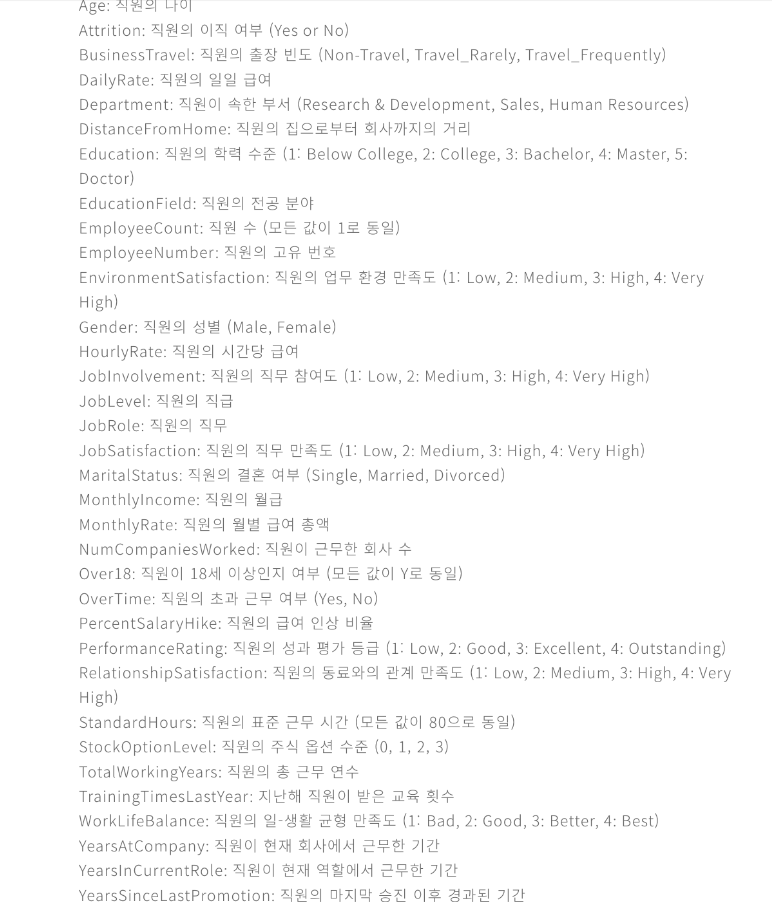

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# 예측 모델링을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split # 훈련/평가 데이터분리
from sklearn.linear_model import LogisticRegression # 로지스틱 모델
from sklearn.svm import LinearSVC # 분류용 SVM모델
from sklearn import metrics # 평가용 모듈
from sklearn.model_selection import cross_val_score # 교차검증 함수

# 모델평가를 위한 라이브러리 불러오기
from sklearn.metrics import classification_report # 분류평가지표

In [2]:
df = pd.read_csv('./data/job_transfer.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 데이터 전처리

In [3]:
df.shape

(1470, 35)

In [4]:
# data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# null값 확인
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# outlier 확인
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 탐색적 데이터 분석(EDA) 

In [7]:
# 이직
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [8]:
# 이직률 : 약 16%
237/ (1233+237)

0.16122448979591836

In [9]:
# 학습 및 집계를 위해서 수치데이터로 변경
# 이직 = 1, 이직안함 = 0 로 수정
# np.where( 조건 , 참이라면 바꿀값, 거짓이라면 바꿀 값)
df['Attrition'] =  np.where(df['Attrition']=='Yes', 1, 0)
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [10]:
# 성별, 연령 분석
# 나이 => 구간화
# where 기능이 2개의 구간으로 나눠주는 함수

df['Age_gp'] = np.where(df['Age'] <=30 , '30대 이하',np.where(df['Age']<=40, '30-40대', '40대 이상'))
df[['Age','Age_gp']]

,Age,Age_gp
0,41,40대 이상
1,49,40대 이상
2,37,30-40대
3,33,30-40대
4,27,30대 이하
...,...,...
1465,36,30-40대
1466,39,30-40대
1467,27,30대 이하
1468,49,40대 이상


In [11]:
# 연령별 이직률 현황
# agg 함수 : aggregate의 약자로, 하나 이상의 함수를 적용하여, 그룹별로 집계 결과를 얻음
df_gp =  df.groupby('Age_gp')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp
# 나이가 어릴수록 이직률이 높음

,count,sum,ratio
Age_gp,,,
30-40대,619,85,13.7
30대 이하,386,100,25.9
40대 이상,465,52,11.2


In [12]:
# 성별 이직률 현황
df_gp =  df.groupby('Gender')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp
# 남성의 이직률이 더 높음

,count,sum,ratio
Gender,,,
Female,588,87,14.8
Male,882,150,17.0


In [13]:
# 부서별 이직률 현황
df_gp =  df.groupby('Department')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp
# sales 부서의 이직률이 가장 높음

,count,sum,ratio
Department,,,
Human Resources,63,12,19.0
Research & Development,961,133,13.8
Sales,446,92,20.6


### 가설1) 업무만족도는 높으나 인간 관계로 인한 이직률이 높을 것이다.

In [14]:
# 인간관계 만족도, 업무 만족도와 이직간의 상관계를 확인
# Jobsatisfaction : 업무만족도 -> 숫자가 클수록 만족
# Relationshipsatisfaction : 인관관계 만족도
df[['JobSatisfaction','RelationshipSatisfaction', 'Attrition']].head()

,JobSatisfaction,RelationshipSatisfaction,Attrition
0,4,1,1
1,2,4,0
2,3,2,1
3,3,3,0
4,2,4,0


In [15]:
# 업무만족도별 이직률 현황
df_gp =  df.groupby('JobSatisfaction')['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp
# 업무만족도가 낮을 수록 이직률이 높다

,count,sum,ratio
JobSatisfaction,,,
1,289,66,22.8
2,280,46,16.4
3,442,73,16.5
4,459,52,11.3


In [16]:
# 인간관계만족도, 업무만족도/ 이직간의 상관관계확인
df_gp =  df.groupby(['JobSatisfaction','RelationshipSatisfaction'])['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp
# -> 업무만족도가 높은 직원은 인간관계에 따라 이직률에 영향을 덜 받는 것으로 보이고,
# -> 업무만족도가 낮은 직원은 인관관계가 낮을 수록 이직률이 증가하는 경향을 보인다.

count  sum  ratio
JobSatisfaction RelationshipSatisfaction                   
1               1                            54   16   29.6
                2                            57   15   26.3
                3                            91   22   24.2
                4                            87   13   14.9
2               1                            53   15   28.3
                2                            57    8   14.0
                3                            81   13   16.0
                4                            89   10   11.2
3               1                            85   16   18.8
                2                            94   11   11.7
                3                           133   19   14.3
                4                           130   27   20.8
4               1                            84   10   11.9
                2                            95   11   11.6
                3                           154   17   11.0
                4                           126   14   11.1

### 가설2) 근속년수 대비 같은 업무를 한 비중이 높다면 이직률이 높을 것이다

In [17]:
# yearsInCurrentRole : 직원이 현재 역할에서 근무한 기간
# yearsAtCompany : 직원이 현재까지 근무한 기간
df[['YearsInCurrentRole','YearsAtCompany']]

,YearsInCurrentRole,YearsAtCompany
0,4,6
1,7,10
2,0,0
3,7,8
4,2,2
...,...,...
1465,2,5
1466,7,7
1467,2,6
1468,6,9


In [18]:
# 근속년수 대비 한가지 이상 역할을 한 비중
df['Role_Company'] = df['YearsInCurrentRole']/df['YearsAtCompany']
df['Role_Company'].fillna(0, inplace=True)    # 0/0 -> Nan으로 출력되기 때문에 처리!!!
df['Role_Company']

0       0.666667
1       0.700000
2       0.000000
3       0.875000
4       1.000000
          ...   
1465    0.400000
1466    1.000000
1467    0.333333
1468    0.666667
1469    0.750000
Name: Role_Company, Length: 1470, dtype: float64

<Axes: xlabel='Role_Company', ylabel='Density'>

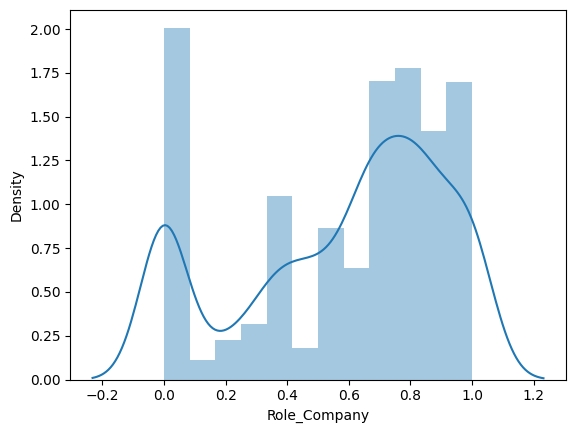

In [19]:
# Role_Company 분포확인
# 데이터의 분포를 시각화 -> distplot  (히스토그램과 커널밀도추정(KDE)를 함께 그려서 데이터 분포 나타내기
sns.distplot(df['Role_Company'])

In [20]:
#  구간화
df['Role_Company_gp'] = np.where(df['Role_Company'] <=0.3 ,'0.3 이하',
         np.where(df['Role_Company'] <=0.6, '0.3 - 0.6', '0.6 이상'))
df[['Role_Company','Role_Company_gp']]

,Role_Company,Role_Company_gp
0,0.666667,0.6 이상
1,0.700000,0.6 이상
2,0.000000,0.3 이하
3,0.875000,0.6 이상
4,1.000000,0.6 이상
...,...,...
1465,0.400000,0.3 - 0.6
1466,1.000000,0.6 이상
1467,0.333333,0.3 - 0.6
1468,0.666667,0.6 이상


In [21]:
df_gp =  df.groupby(['Role_Company_gp'])['Attrition'].agg(['count', 'sum'])
df_gp['ratio'] = round(df_gp['sum']/df_gp['count'] *100, 1)
df_gp

,count,sum,ratio
Role_Company_gp,,,
0.3 - 0.6,321,38,11.8
0.3 이하,323,89,27.6
0.6 이상,826,110,13.3


### 가설3) 야근을 많이 해도 급여인상률이 높다면 이직률이 낮을 것이다.

In [22]:
# 야근 여부에 따른 이직률 현황
df_gp = df.groupby('OverTime')['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count']) * 100, 1)
df_gp

,count,sum,ratio
OverTime,,,
No,1054,110,10.4
Yes,416,127,30.5


In [23]:
# PercentSalaryHike : 연봉 인상률
# OverTime : 야근여부
df_gp = df.groupby(['OverTime','PercentSalaryHike'])['Attrition'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum']/df_gp['count']) * 100, 1)
df_gp

count  sum  ratio
OverTime PercentSalaryHike                   
No       11                   149   19   12.8
         12                   139   18   12.9
         13                   144   14    9.7
         14                   145    8    5.5
         15                    80   12   15.0
         16                    55    8   14.5
         17                    66    9   13.6
         18                    60    5    8.3
         19                    55    3    5.5
         20                    40    4   10.0
         21                    36    2    5.6
         22                    41    6   14.6
         23                    19    1    5.3
         24                    12    1    8.3
         25                    13    0    0.0
Yes      11                    61   22   36.1
         12                    59   15   25.4
         13                    65   20   30.8
         14                    56   16   28.6
         15                    21    6   28.6
         16                    23    6   26.1
         17                    16    5   31.2
         18                    29    8   27.6
         19                    21    6   28.6
         20                    15    3   20.0
         21                    12    3   25.0
         22                    15    6   40.0
         23                     9    5   55.6
         24                     9    5   55.6
         25                     5    1   20.0

In [24]:
# 야근을 안하는 사람들의 연봉인상에 따른 이직률 평균계산
df_gp.loc['No']['ratio'].mean()
# 야근을 안하는 직원은 연봉 인상률과 관계없이 평균(16%)보다 낮은 편

9.440000000000001

<Axes: xlabel='PercentSalaryHike', ylabel='ratio'>

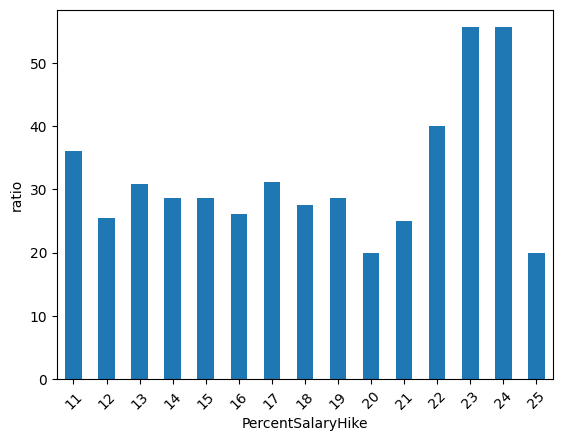

In [25]:
# 야근을 하는 사람들을 분석 (bar차트 시각화)
df_gp.loc['Yes']['ratio'].plot(kind='bar', ylabel='ratio', rot=45)

## 모델링
- 문제와 답 분리
- 글자를 숫자로 변경하는 작업(인코딩)
    1. 원핫인코딩
    2. 레이블인코딩
- 훈련용데이터와 평가용데이터 분리
- 선형분류 모델활용 학습 : LinearRegression, SVM
- 모델평가

In [26]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_gp', 'Role_Company', 'Role_Company_gp'],
      dtype='object')

In [27]:
#문제와 답 분리
df_x = df.drop(['Attrition','Age_gp','Role_Company','Role_Company_gp'], axis=1)
y = df['Attrition']

In [28]:
df_x.shape, y.shape

((1470, 34), (1470,))

In [29]:
# 숫자형태의 데이터와 글자형태의 데이터 분리
x_types = df_x.dtypes == 'O' # 대문자 O(Object)

In [30]:
# Boolean 색인 활용하기
categorical_list = list(x_types[x_types==True].index)
numeric_list = list(x_types[x_types==False].index)

In [31]:
df_x[categorical_list]

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [32]:
# 레이블 인코딩 연습
# 출장의 빈도에 따라 이직률에 영향을 주지 않을까?
df_x['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [33]:
BT_dict = {'Non-Travel' : 0, 'Travel_Rarely' : 1, 'Travel_Frequently' : 2}
df_x['BusinessTravel'] = df_x['BusinessTravel'].map(BT_dict)

In [34]:
# 원핫인코딩 연습
x_one_hot = pd.get_dummies(df_x[categorical_list],dtype='int32')

In [35]:
x_one_hot

,BusinessTravel,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
1,2,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,1,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,1
3,2,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1466,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
1467,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1468,2,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,1,1,0


In [36]:
# 숫자타입 컬럼과 인코딩된 컬럼 병합
X = pd.concat([df_x[numeric_list], x_one_hot], axis=1)
X.shape, y.shape

((1470, 53), (1470,))

In [37]:
# 훈련용과 평가용 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, # 문제와 정답
                                                   test_size=0.3, # 테스트데이터의 비율
                                                   random_state=819, # 같은 샘플추출을 위한 난수고정
                                                   stratify=y) # 훈련용과 평가용의 정답 클래스 비율 유지

In [38]:
# 선형분류 모델활용 학습
# 1.모델객체 생성
attrition_logi = LogisticRegression()
attrition_svm = LinearSVC()

In [39]:
# 2.모델학습
attrition_logi.fit(X_train, y_train)
attrition_svm.fit(X_train, y_train)

LinearSVC()

In [40]:
# 3.모델예측
logi_pre = attrition_logi.predict(X_test)
svm_pre = attrition_svm.predict(X_test)

In [41]:
# 4.모델평가(정확도)
print("Logi accuracy : ", metrics.accuracy_score(y_test, logi_pre))
print("SVM accuracy : ", metrics.accuracy_score(y_test, svm_pre))

Logi accuracy :  0.8390022675736961
SVM accuracy :  0.873015873015873


## 모델링 심화

### 교차검증(cross-validation)
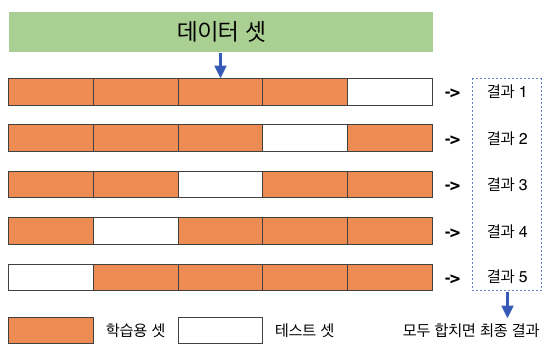

In [42]:
# 로지스틱 모델의 교차검증 결과
cross_val_score(attrition_logi, X_train, y_train, cv=5).mean()

0.8386834004262372

In [43]:
# SVM 모델의 교차검증 결과
cross_val_score(attrition_svm, X_train, y_train, cv=5).mean()

0.8717215249822401

### 하이퍼파라미터 튜닝
- 모델이 가지고 있는 파라미터를 최적화 해서 성능을 끌어올리는 기법
- 선형분류 모델의 하이퍼파라미터
    - C : 규제 파라미터 => 모델의 복잡도를 제어하는 파라미터
    - C값이 작을수록 규제가 강력해진다 => W가 적당하게 커지지 못하도록 하는 것 => 과소적합 우려
    - C값이 클수록 규제가 약해진다 => W가 너무 커지는 상황발생 => 과대적합 우려

##### LogisticRegression

In [44]:
# 규제 파라미터 값을 모은 리스트
C_list = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
# 훈련용데이터 평가점수를 담을 리스트
train_list = []
# 평가용데이터 평가점수를 담을 리스트
test_list = []
for my_C in C_list : # 규제가 약한것부터 강한것까지 테스트
    logi2 = LogisticRegression(C=my_C) # 선형분류 모델객체 생성
    logi2.fit(X_train, y_train) # 훈련용데이터 학습
    
    pre_train = logi2.predict(X_train) # 훈련용데이터 예측
    score_train = metrics.accuracy_score(y_train,pre_train) # 정확도 계산(실제값, 예측값)
    train_list.append(score_train) # 리스트에 훈련용데이터 점수 추가

    pre_test = logi2.predict(X_test) # 평가용데이터 예측
    score_test = metrics.accuracy_score(y_test,pre_test) # 정확도 계산(실제값, 예측값)
    test_list.append(score_test) # 리스트에 평가용데이터 점수 추가

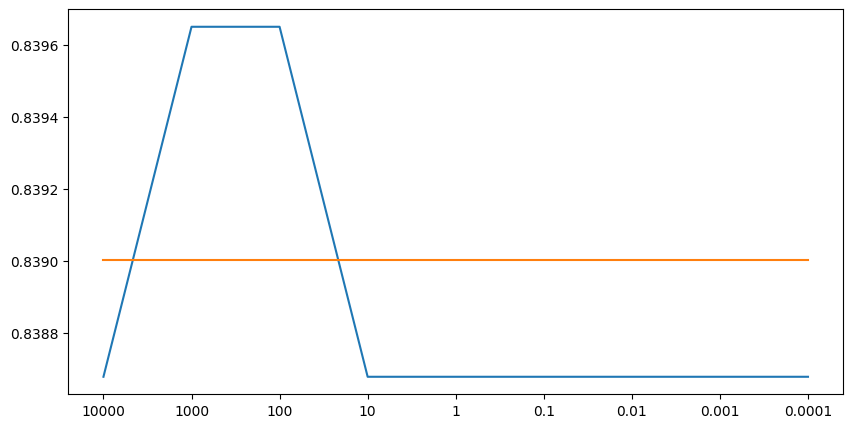

In [45]:
# 튜닝결과 시각화
plt.figure(figsize=(10,5)) # 가로,세로 비율
plt.plot(train_list) # 라인그래프 그리기
plt.plot(test_list) # 라인그래프 그리기
plt.xticks(range(len(C_list)), C_list) # x축 눈금 지정
plt.show() # 그래프 보여주기

##### Linear SVC

In [46]:
# 규제 파라미터 값을 모은 리스트
C_list = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
# 훈련용데이터 평가점수를 담을 리스트
train_list = []
# 평가용데이터 평가점수를 담을 리스트
test_list = []
for my_C in C_list : # 규제가 약한것부터 강한것까지 테스트
    svc = LinearSVC(C=my_C, random_state=820) # 선형분류 모델객체 생성
    svc.fit(X_train, y_train) # 훈련용데이터 학습
    
    pre_train = svc.predict(X_train) # 훈련용데이터 예측
    score_train = metrics.accuracy_score(y_train,pre_train) # 정확도 계산(실제값, 예측값)
    train_list.append(score_train) # 리스트에 훈련용데이터 점수 추가

    pre_test = svc.predict(X_test) # 평가용데이터 예측
    score_test = metrics.accuracy_score(y_test,pre_test) # 정확도 계산(실제값, 예측값)
    test_list.append(score_test) # 리스트에 평가용데이터 점수 추가

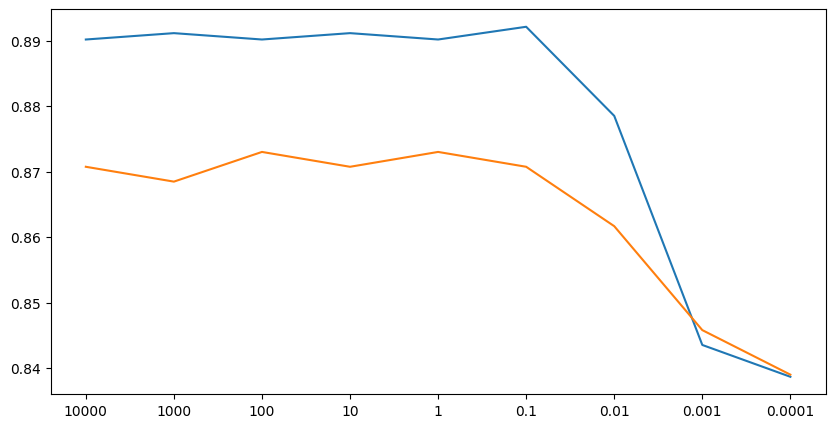

In [47]:
# 튜닝결과 시각화
plt.figure(figsize=(10,5)) # 가로,세로 비율
plt.plot(train_list) # 라인그래프 그리기
plt.plot(test_list) # 라인그래프 그리기
plt.xticks(range(len(C_list)), C_list) # x축 눈금 지정
plt.show() # 그래프 보여주기

### 교차검증을 이용한 하이퍼파라미터 튜닝

In [48]:
# 규제 파라미터 값을 모은 리스트
C_list = [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
# 교차검증 평가점수를 담을 리스트
cross_val_list = []
# 평가용데이터 평가점수를 담을 리스트
test_list = []
for my_C in C_list : # 규제가 약한것부터 강한것까지 테스트
    svc = LinearSVC(C=my_C, random_state=820) # 선형분류 모델객체 생성
    cv_score = cross_val_score(svc, X_train, y_train, cv=5).mean() # 교차검증 점수평균
    cross_val_list.append(cv_score) # 교차검증 점수평균을 리스트에 추가

    svc.fit(X_train,y_train) # 모델학습
    pre_test = svc.predict(X_test) # 평가용데이터 예측
    score_test = metrics.accuracy_score(y_test,pre_test) # 정확도 계산(실제값, 예측값)
    test_list.append(score_test) # 리스트에 평가용데이터 점수 추가

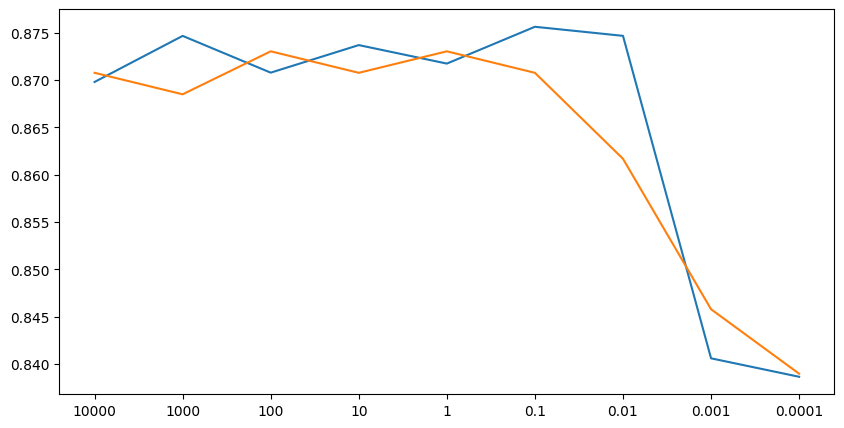

In [49]:
# 튜닝결과 시각화
plt.figure(figsize=(10,5)) # 가로,세로 비율
plt.plot(cross_val_list) # 라인그래프 그리기
plt.plot(test_list) # 라인그래프 그리기
plt.xticks(range(len(C_list)), C_list) # x축 눈금 지정
plt.show() # 그래프 보여주기

## 모델평가

In [50]:
# 하이퍼파라미터 튜닝이 끝난 모델생성
logi3 = LogisticRegression(C=1)
svc2 = LinearSVC(random_state=820, C=0.001)

In [51]:
# 모델학습
logi3.fit(X_train, y_train)
svc2.fit(X_train, y_train)

LinearSVC(C=0.001, random_state=820)

In [52]:
# 모델예측
logi_pre = logi3.predict(X_test)
svc_pre = svc2.predict(X_test)

In [53]:
# 다양한 분류평가지표로 검증
print(classification_report(y_test, logi_pre))
print(classification_report(y_test, svc_pre))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       0.00      0.00      0.00        71

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.70      0.84      0.77       441

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       370
           1       1.00      0.04      0.08        71

    accuracy                           0.85       441
   macro avg       0.92      0.52      0.50       441
weighted avg       0.87      0.85      0.78       441

